In [1]:
%%capture
%run test_data.ipynb

In [2]:
import sys 
sys.path.append('..')
import portfolios as p

# Do momentum portfolios work as expected?

Strategy: at the beginning of each month form portfolios based on momentum.

Momentum here: return of the stock in last month. Stocks are assigned into $N$ portfolios based on momentum. Worst performing stocks into the $\#1$ portfolio and best performing stocks into the $\#N$ portfolio. Portfolios are rebalanced monthly.

### Data

CRSP monthly. All US listed stocks from 201502 to 201911.

In [3]:
filtered_data = p.filter_me(data,1) # Remove the smallest 10% of stocks by ME (for each date) from the universe

Progress...
201601 201512 201602 201505 201506 201604 201504 201603 201509 201503 201511 201510 201507 201501 201502 201508 201605 201608 201609 201607 201611 201606 201703 201701 201610 201707 201612 201702 201704 201705 201706 201708 201709 201710 201803 201711 201802 201712 201804 201805 201808 201801 201806 201811 201809 201810 201812 201807 201901 201902 201905 201904 201906 201903 201908 201910 201907 201909 201911 201912 Done. Execution time: 302.253s


In [4]:
lag_data = p.lag_returns(data,1) # Adds LRET_1 variable (lagged returns) to the data

### $N=5$

In [ ]:
assigned_data_5 = p.form_portfolios(lag_data,'LRET_1',5)

Number of stocks in the portfolios.

In [ ]:
p.portfolios_summary_table(assigned_data_5,'LRET_1').head()

In [ ]:
returns_5 = p.portfolios_returns_mean_table(assigned_data_5,'LRET_1',5)[:-1]

In [ ]:
p.plot_cumulative(returns_5)

In [ ]:
returns_5.plot(title='Returns',figsize=(10,6))

In [ ]:
returns_5.boxplot(figsize=(10,6))

In [ ]:
returns_5.describe()

In [ ]:
p.quantile_table(assigned_data_5,'LRET_1',5).head()

### $N=10$

In [ ]:
assigned_data_10 = p.form_portfolios(lag_data,'LRET_1',10)

Number of stocks in the portfolios.

In [ ]:
returns_10 = p.portfolios_returns_mean_table(assigned_data_10,'LRET_1',10)[:-1]

In [ ]:
p.plot_cumulative(returns_10)

In [ ]:
returns_10.plot(title='Returns',figsize=(10,6))

In [ ]:
returns_10.boxplot(figsize=(10,6))

In [ ]:
returns_10.describe()

In [ ]:
p.quantile_table(assigned_data_10,'LRET_1',10).head()

### $N=20$

In [5]:
assigned_data_20 = p.form_portfolios(lag_data,'LRET_1',20)

Progress...
201605 201604 201603 201509 201507 201506 201508 201510 201602 201512 201503 201601 201502 201504 201505 201511 201608 201607 201609 201606 201611 201612 201704 201708 201610 201707 201701 201703 201709 201702 201705 201706 201710 201711 201801 201807 201712 201802 201808 201803 201809 201804 201810 201805 201912 201901 201501 201811 201806 201812 201902 201903 201904 201905 201906 201908 201909 201907 201911 201910 Done. Execution time: 290.45s


In [6]:
p.quantile_table(lag_data,'LRET_1',20).head()

,date,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,201502,-0.201109,-0.156603,-0.129900,-0.109967,-0.096099,-0.084577,-0.071738,-0.058910,-0.048120,...,-0.027157,-0.017234,-0.007591,0.003772,0.016971,0.036168,0.054810,0.089825,0.157521,1.443877
1,201503,-0.097240,-0.057117,-0.030692,-0.010707,0.002778,0.013144,0.023823,0.035688,0.045849,...,0.065504,0.075177,0.085871,0.098843,0.114081,0.129568,0.155996,0.193817,0.267751,3.736842
2,201504,-0.154679,-0.105240,-0.074714,-0.055281,-0.040111,-0.028543,-0.018643,-0.010482,-0.002730,...,0.011980,0.020057,0.028239,0.038002,0.049074,0.063572,0.082896,0.112004,0.170752,1.659824
3,201505,-0.153880,-0.111657,-0.086538,-0.069785,-0.055600,-0.045531,-0.035981,-0.027854,-0.019306,...,-0.004581,0.002560,0.011859,0.023105,0.035854,0.051632,0.073832,0.111985,0.184180,9.564357
4,201506,-0.157096,-0.102917,-0.073795,-0.050910,-0.035019,-0.023173,-0.013196,-0.004872,0.001617,...,0.015196,0.023170,0.031456,0.041265,0.053475,0.070927,0.092600,0.130288,0.208163,2.124024


In [7]:
p.portfolios_size_summary(assigned_data_20,'LRET_1').head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
date,,,,,,,,,,,,,,,,,,,,
201502,176,176.0,175.0,176.0,175.0,176.0,176.0,175.0,176.0,175.0,176.0,176.0,175.0,176.0,175.0,176.0,176.0,175.0,176.0,176
201503,177,177.0,177.0,177.0,177.0,177.0,176.0,177.0,177.0,177.0,177.0,177.0,177.0,176.0,177.0,177.0,177.0,177.0,177.0,177
201504,178,177.0,177.0,177.0,177.0,177.0,178.0,177.0,177.0,177.0,177.0,177.0,177.0,178.0,177.0,177.0,177.0,177.0,177.0,178
201505,177,177.0,176.0,177.0,177.0,176.0,177.0,177.0,176.0,177.0,177.0,176.0,177.0,177.0,176.0,177.0,177.0,176.0,177.0,177
201506,177,177.0,177.0,177.0,177.0,177.0,176.0,177.0,177.0,177.0,177.0,177.0,177.0,176.0,177.0,177.0,177.0,177.0,177.0,177


In [8]:
p.portfolios_me_summary(assigned_data_20,'LRET_1',20).head()

..\portfolios.py:137: RuntimeWarning: Mean of empty slice.
  d[i] = data.loc[(data['date'] == date) & (data[name] == i)]['ME'].values.mean()
c:\users\jaakko\python\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
date,,,,,,,,,,,,,,,,,,,,
201502,809.539127,2753.583633,6825.017493,6385.717868,3376.561581,5370.513056,4263.614685,8369.515486,8456.350466,11369.448892,8358.775741,7201.739515,12060.538812,8586.440923,6629.816332,6202.872380,5651.801942,10988.669932,5636.702351,1334.989184
201503,747.994347,3010.267343,2403.580934,6726.813130,3228.940234,4776.311195,6383.102428,8248.388766,9423.809560,12927.701310,10509.201832,7802.684168,7811.666396,9678.036553,11639.139067,8614.872247,6504.204718,3157.279782,2326.270845,1463.517893
201504,522.753148,2278.916458,4774.855540,9018.492847,9521.452116,15657.005060,11413.270756,18264.170373,12325.249908,4879.579851,5105.129007,7466.994883,4694.917401,5487.148336,4740.608809,3181.450444,3301.777175,2378.069895,1504.267851,1034.704743
201505,783.890876,2227.774569,2190.309934,3464.512668,5715.955380,5091.738469,5926.826722,5087.550993,10004.245690,8641.867546,8782.623778,5962.075834,11164.322124,7909.116139,10915.453244,12278.274733,6925.009742,7905.086051,3987.191535,4007.744100
201506,613.792761,2392.794464,2054.436040,4289.499782,4741.769780,6475.103857,8276.688746,6997.055619,8045.269508,9012.091718,10959.050767,11877.056930,8356.112213,12264.225555,11777.540050,5286.494838,3603.049067,5783.734156,2058.063409,1430.561308


In [13]:
p.portfolio_at_date(assigned_data_20,'201502','LRET_1',1).reset_index().drop('index',1)

,TICKER,COMNAM,LRET_1,RET
0,BCPC,BALCHEM CORP,-0.205132,0.112328
1,DJCO,DAILY JOURNAL CORP,-0.283297,0.029231
2,UIS,UNISYS CORP,-0.256106,0.032376
3,AIRT,AIR T INC,-0.205710,-0.023141
4,HRTX,HERON THERAPEUTICS INC,-0.214712,0.644304
...,...,...,...,...
171,CLD,CLOUD PEAK ENERGY INC,-0.260349,0.220913
172,CXDC,CHINA X D PLASTICS CO LTD,-0.270718,0.073232
173,AMCO,ARMCO METALS HOLDINGS INC,-0.340413,-0.139943
174,PSTR,POSTROCK ENERGY CORP,-0.572222,1.545455


In [14]:
returns_20 = p.portfolios_returns_mean_table(assigned_data_20,'LRET_1',20)

..\portfolios.py:157: RuntimeWarning: Mean of empty slice.
  returns[i] = p_data["RET"].values.mean()


In [15]:
returns_20 = returns_20[:-2]

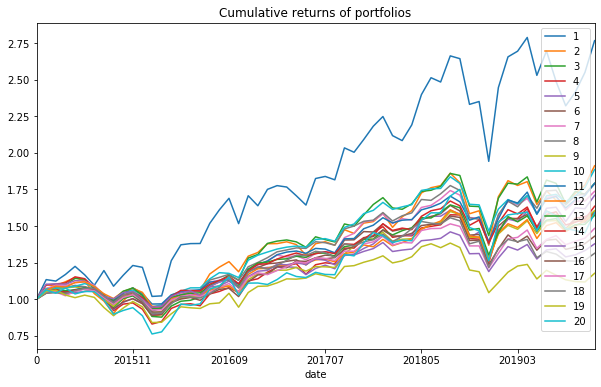

In [17]:
p.plot_cumulative(returns_20)

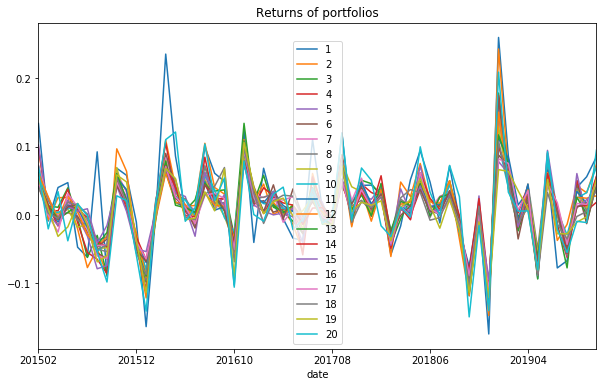

In [18]:
p.plot_returns(returns_20)

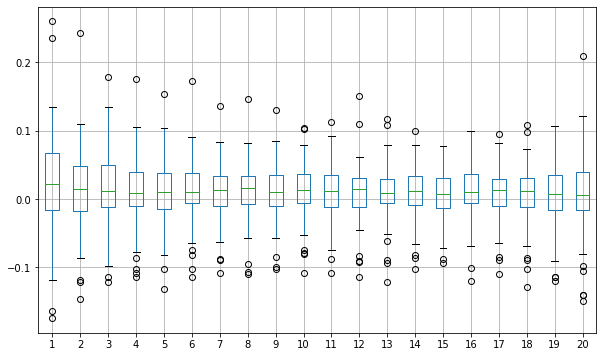

In [19]:
returns_20.boxplot(figsize=(10,6))

In [20]:
returns_20.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,0.020907,0.013295,0.011683,0.009502,0.010651,0.009230,0.010615,0.011127,0.009131,0.011911,0.010979,0.008892,0.008762,0.009350,0.006255,0.007055,0.007664,0.005744,0.003974,0.010241
std,0.081509,0.065169,0.056748,0.054212,0.052644,0.048417,0.046172,0.046375,0.043614,0.042878,0.041895,0.044439,0.043305,0.041061,0.037708,0.041621,0.040988,0.045365,0.048110,0.066979
min,-0.173997,-0.146972,-0.121575,-0.113711,-0.131272,-0.113858,-0.108737,-0.109874,-0.101951,-0.108826,-0.108454,-0.113884,-0.121852,-0.102701,-0.094181,-0.120065,-0.110155,-0.128390,-0.120481,-0.148991
25%,-0.015732,-0.017781,-0.011265,-0.009651,-0.014072,-0.005180,-0.009937,-0.007592,-0.010610,-0.005502,-0.011405,-0.011535,-0.005857,-0.009254,-0.013449,-0.006253,-0.010517,-0.011032,-0.016784,-0.015683
50%,0.022452,0.014238,0.012294,0.008799,0.009928,0.009501,0.012707,0.015372,0.009797,0.012492,0.012320,0.015076,0.009188,0.012237,0.007390,0.009934,0.012454,0.011005,0.007476,0.005800
75%,0.067743,0.048153,0.049025,0.039308,0.037714,0.038208,0.033599,0.033892,0.035597,0.036539,0.034662,0.031184,0.029326,0.033304,0.030619,0.036323,0.028570,0.031289,0.035032,0.039136
max,0.259627,0.242802,0.178360,0.175069,0.153581,0.172695,0.136587,0.146932,0.129803,0.103839,0.112290,0.150344,0.117208,0.100063,0.078113,0.099204,0.094600,0.108136,0.106277,0.208949
